In [69]:
import numpy as np
import matplotlib.pyplot as plt

$\begin{cases}
    \dot x = y \\
    \dot y = x - z \\
    \dot z = x + xz + 2.7 y
\end{cases}$

Стационарные точки:

$(x,y,z) = (0,0,0)$

$\hspace{1.0cm}\lambda_1 \approx -0.51$, $\hspace{0.25cm}\lambda_{2,3} \approx 0.26 \pm 1.38 i$

$(x,y,z) = (-1,0,-1)$

$\hspace{1.0cm}\lambda_1 \approx 0.43$, $\hspace{0.25cm}\lambda_{2,3} \approx -0.72 \pm 1.34 i$

In [70]:
def x_dot(x,y,z,*dist):
    return y
#     sigma = 10
#     return sigma*(y - x)

def y_dot(x,y,z,*dist):
    return x - z
#     r = 28
#     return r*x - y - x*z

def z_dot(x,y,z,*dist):
    return x + x*z + 2.7*y
#     b = 8/3
#     return x*y - b*z

$\begin{cases}
    \dot{\tilde x} = \tilde y \\
    \dot{\tilde y} = \tilde x - \tilde z \\
    \dot{\tilde z} = \tilde x + \tilde x z + x \tilde z + 2.7 \tilde y
\end{cases}$

In [71]:
def x_dist_dot(x,y,z,x_dist,y_dist,z_dist):
    return y_dist
#     sigma = 10
#     return sigma*(y_dist - x_dist)

def y_dist_dot(x,y,z,x_dist,y_dist,z_dist):
    return x_dist - z_dist
#     r = 28
#     return r*x_dist - y_dist - x*z_dist - x_dist*z

def z_dist_dot(x,y,z,x_dist,y_dist,z_dist):
    return x_dist + x_dist*z + x*z_dist + 2.7*y_dist
#     b = 8/3
#     return x*y_dist + x_dist*y - b*z_dist

In [72]:
def runge_kutta(F,X_0,T,tau):
    X = np.zeros((len(T),len(X_0)))
    X[0] = X_0
    for i in range(len(T)-1):
        k_1 = np.array([f(*X[i]) for f in F])
        k_2 = np.array([f(*(X[i]+tau/2*k_1)) for f in F])
        k_3 = np.array([f(*(X[i]+tau/2*k_2)) for f in F])
        k_4 = np.array([f(*(X[i]+tau*k_3)) for f in F])
        X[i+1] = X[i] + tau/6*(k_1+2*k_2+2*k_3+k_4)
    return X

<IPython.core.display.Javascript object>


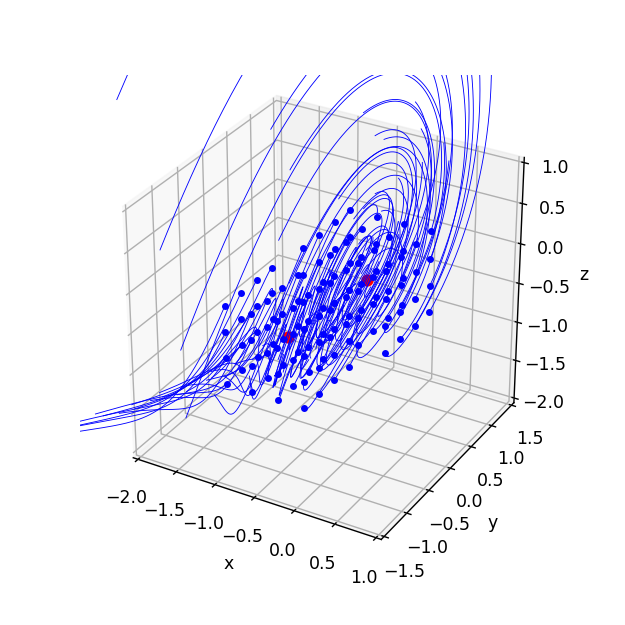

In [73]:
# Построение фазового портрета

t_end = 2; tau_0 = 1e-2
T,tau = np.linspace(0,t_end,int(t_end/tau_0)+1,retstep=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d',xlim=(-2,1),ylim=(-1.5,1.5),zlim=(-2,1))
#ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])

ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')

ax.plot(0,0,0,color='red',marker='o')
ax.plot(-1,0,-1,color='red',marker='o')

def draw_trajectories(x_stat,y_stat,z_stat,l,n):
    X_0,Y_0,Z_0 = np.linspace(x_stat-l,x_stat+l,n),np.linspace(y_stat-l,y_stat+l,n),np.linspace(z_stat-l,z_stat+l,n)
    for x_0 in X_0:
        for y_0 in Y_0:
            for z_0 in Z_0:
                Solve = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([x_0,y_0,z_0]),T,tau)
                ax.plot(x_0,y_0,z_0,color='blue',marker='o',markersize=3)
                ax.plot(Solve[:,0],Solve[:,1],Solve[:,2],color='blue',linewidth=0.5)

draw_trajectories(0,0,0,0.5,4)
draw_trajectories(-1,0,-1,0.5,4)

In [43]:
def S(x,y,z):
    return z - z_S_0

def dSdx(x,y,z):
    return 0

def dSdy(x,y,z):
    return 0

def dSdz(x,y,z):
    return np.ones_like(z)

In [44]:
def H(x,y,z):
    return dSdx(x,y,z)*x_dot(x,y,z) + dSdy(x,y,z)*y_dot(x,y,z) + dSdz(x,y,z)*z_dot(x,y,z)

def dxdS(x,y,z):
    return x_dot(x,y,z)/H(x,y,z)

def dydS(x,y,z):
    return y_dot(x,y,z)/H(x,y,z)

def dzdS(x,y,z):
    return z_dot(x,y,z)/H(x,y,z)

In [45]:
# Нахождение точек пересечения траектории с поверхностью с помощью алгоритма Эно

def find_intersections(x,y,z,S,double_sided):
    Intersections = []
    if double_sided == False: sigma = np.sign(S(x[1],y[1],z[1]))
    for i in range(2,len(x)):
        S_i = S(x[i],y[i],z[i])
        if (double_sided == False and np.sign(S_i) != np.sign(S(x[i-1],y[i-1],z[i-1])) and np.sign(S_i) == sigma) or (double_sided and np.sign(S_i) != np.sign(S(x[i-1],y[i-1],z[i-1]))):
            Solve = runge_kutta(np.array([dxdS,dydS,dzdS]),np.array([x[i],y[i],z[i]]),np.zeros(2),-S_i)
            Intersections.append([*Solve[-1]])
    return Intersections

<IPython.core.display.Javascript object>


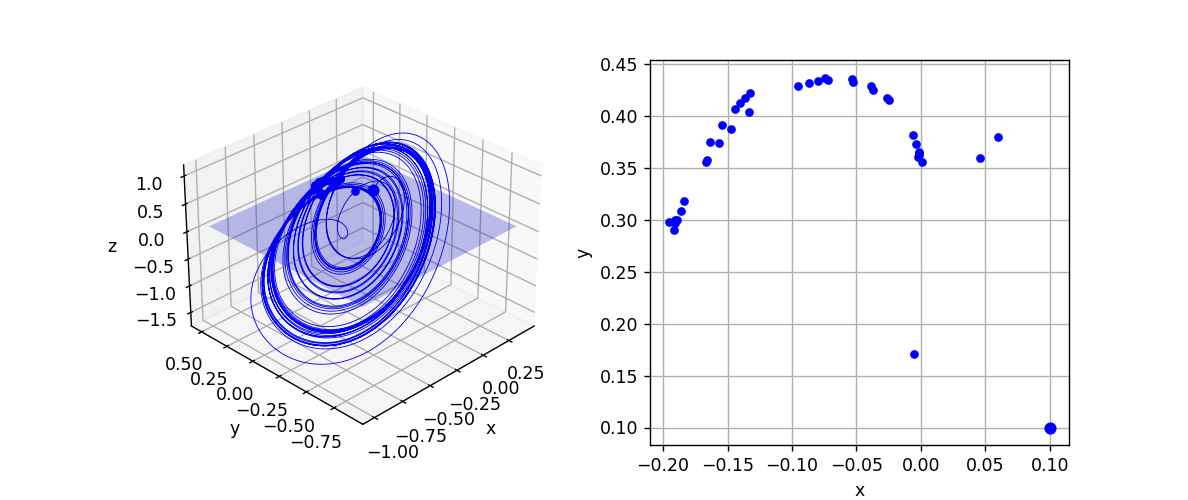

In [46]:
# Сечение Пуанкаре вблизи точки (0,0,0)

t_end = 200; tau_0 = 1e-2
T,tau = np.linspace(0,t_end,int(t_end/tau_0)+1,retstep=True)

fig = plt.figure(figsize=(9.5,4))

axs0 = fig.add_subplot(1,2,1,projection='3d')
axs0.set_xlabel('x'); axs0.set_ylabel('y'); axs0.set_zlabel('z')
axs0.view_init(30,-135)

axs1 = fig.add_subplot(1,2,2)
axs1.set_xlabel('x'); axs1.set_ylabel('y')
axs1.grid()

x_S_0 = 0.1; y_S_0 = 0.1; z_S_0 = 0.1

Solve = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([x_S_0,y_S_0,z_S_0]),T,tau)
axs0.plot(x_S_0,y_S_0,z_S_0,color='blue',marker='o',markersize=6)
axs0.plot(Solve[:,0],Solve[:,1],Solve[:,2],color='blue',linewidth=0.5)

axs1.plot(x_S_0,y_S_0,color='blue',marker='o',markersize=6)

x_S = [-1,0.4]; y_S = [-0.9,0.5]
X_S,Y_S = np.meshgrid(x_S,y_S)
axs0.plot_surface(X_S,Y_S,z_S_0*np.ones_like(X_S),color='blue',alpha=0.25)

Intersections = find_intersections(Solve[:,0],Solve[:,1],Solve[:,2],S,double_sided=False)
for intersections in Intersections:
    axs0.plot(*intersections,color='blue',marker='o',markersize=4)
    axs1.plot(intersections[0],intersections[1],color='blue',marker='o',markersize=4)

<IPython.core.display.Javascript object>


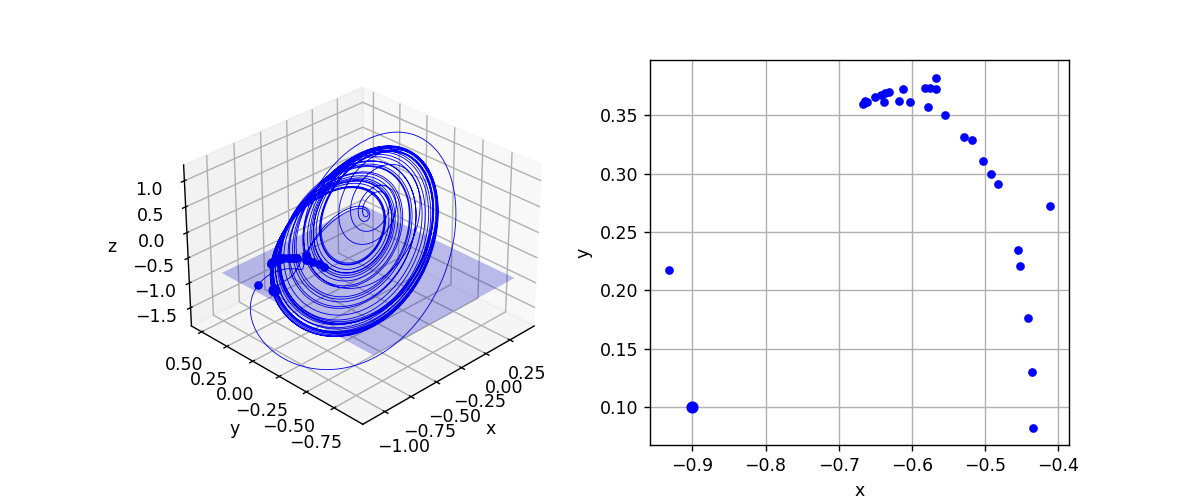

In [47]:
# Сечение Пуанкаре вблизи точки (-1,0,-1)

t_end = 200; tau_0 = 1e-2
T,tau = np.linspace(0,t_end,int(t_end/tau_0)+1,retstep=True)

fig = plt.figure(figsize=(9.5,4))

axs0 = fig.add_subplot(1,2,1,projection='3d')
axs0.set_xlabel('x'); axs0.set_ylabel('y'); axs0.set_zlabel('z')
axs0.view_init(30,-135)

axs1 = fig.add_subplot(1,2,2)
axs1.set_xlabel('x'); axs1.set_ylabel('y')
axs1.grid()

x_S_0 = -1+0.1; y_S_0 = 0.1; z_S_0 = -1+0.1

Solve = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([x_S_0,y_S_0,z_S_0]),T,tau)
axs0.plot(x_S_0,y_S_0,z_S_0,color='blue',marker='o',markersize=6)
axs0.plot(Solve[:,0],Solve[:,1],Solve[:,2],color='blue',linewidth=0.5)

axs1.plot(x_S_0,y_S_0,color='blue',marker='o',markersize=6)

x_S = [-1,0.4]; y_S = [-0.9,0.5]
X_S,Y_S = np.meshgrid(x_S,y_S)
axs0.plot_surface(X_S,Y_S,z_S_0*np.ones_like(X_S),color='blue',alpha=0.25)

Intersections = find_intersections(Solve[:,0],Solve[:,1],Solve[:,2],S,double_sided=False)
for intersections in Intersections:
    axs0.plot(*intersections,color='blue',marker='o',markersize=4)
    axs1.plot(intersections[0],intersections[1],color='blue',marker='o',markersize=4)

<IPython.core.display.Javascript object>


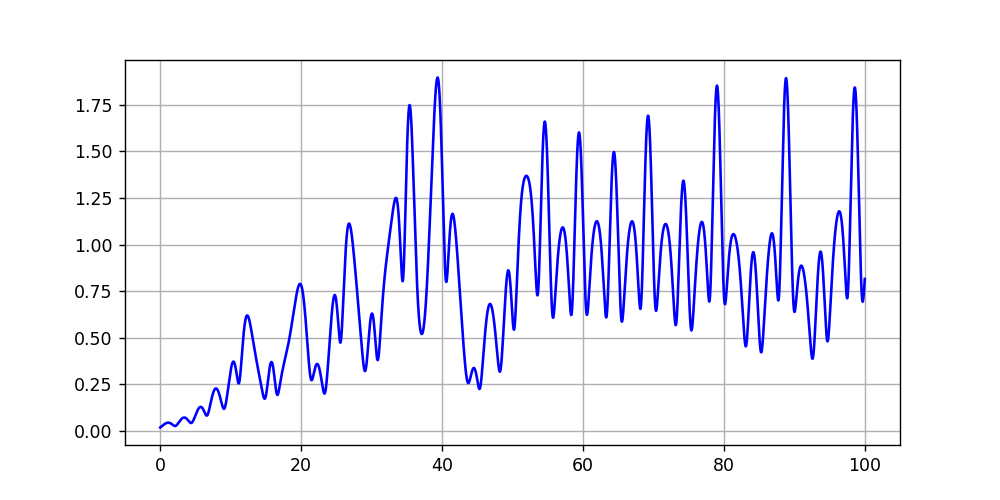

In [50]:
# График расхождения двух траекторий вблизи точки (0,0,0)

t_end = 100; tau_0 = 1e-2
T,tau = np.linspace(0,t_end,int(t_end/tau_0)+1,retstep=True)

Solve_1 = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([0+0.01,0.01,0+0.01]),T,tau)
Solve_2 = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([0+0.02,0.02,0+0.02]),T,tau)

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.grid()

ax.plot(T,np.linalg.norm(Solve_1-Solve_2,axis=-1),color='blue',linewidth=1.5)

<IPython.core.display.Javascript object>


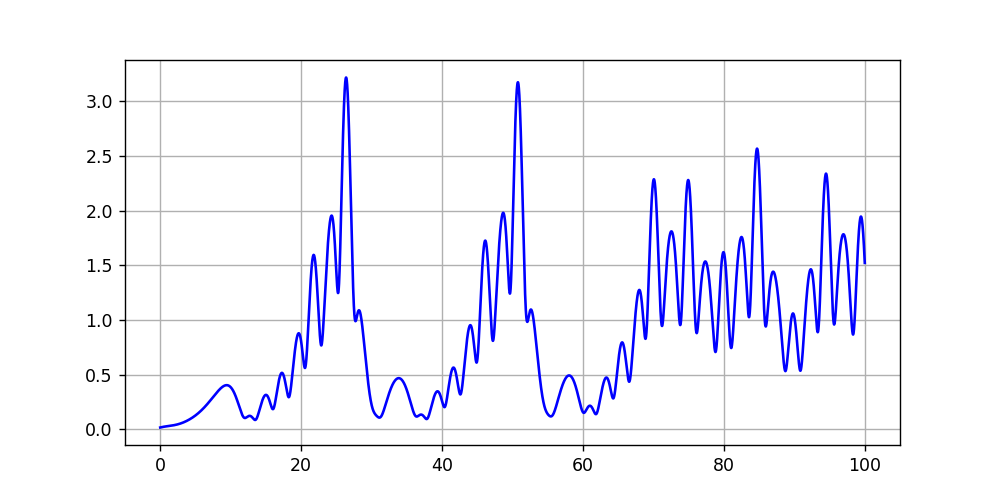

In [52]:
# График расхождения двух траекторий вблизи точки (-1,0,-1)

t_end = 100; tau_0 = 1e-2
T,tau = np.linspace(0,t_end,int(t_end/tau_0)+1,retstep=True)

Solve_1 = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([-1+0.01,0.01,-1+0.01]),T,tau)
Solve_2 = runge_kutta(np.array([x_dot,y_dot,z_dot]),np.array([-1+0.02,0.02,-1+0.02]),T,tau)

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.grid()

ax.plot(T,np.linalg.norm(Solve_1-Solve_2,axis=-1),color='blue',linewidth=1.5)

IntProgress(value=0, max=500)

0.2547118885370715 0.2555517245287973 -0.5081541723092744


<IPython.core.display.Javascript object>


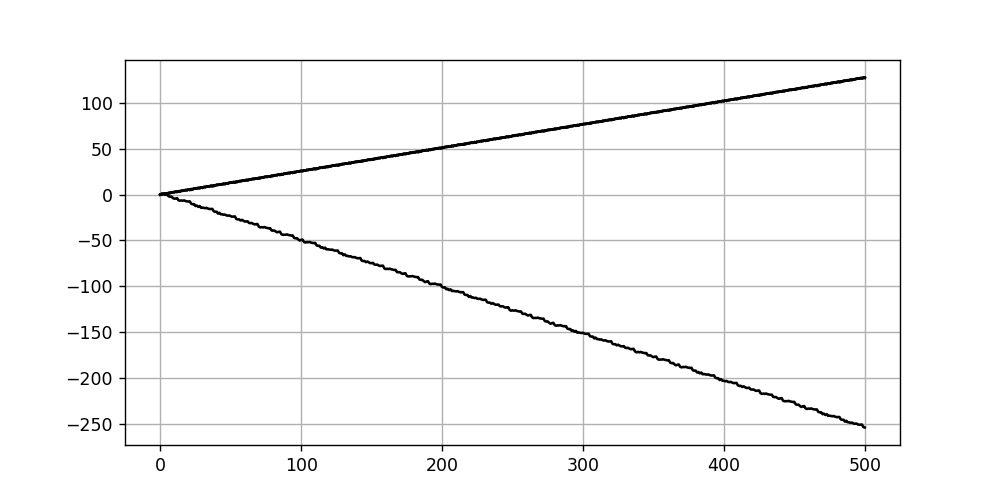

In [77]:
# Расчёт показателей Ляпунова

from ipywidgets import IntProgress
from IPython.display import display

vec_1 = np.array([0,0,0])
vec_dist_1 = np.array([1,0,0])
vec_dist_2 = np.array([0,1,0])
vec_dist_3 = np.array([0,0,1])

M = 500
T_end = 1; tau_0 = 1e-2
T,tau = np.linspace(0,T_end,int(T_end/tau_0)+1,retstep=True)

S_1,S_2,S_3 = 0,0,0
S_1_vals,S_2_vals,S_3_vals = np.zeros(M+1),np.zeros(M+1),np.zeros(M+1)

f = IntProgress(min=0,max=M)
display(f)

for i in range(M):
    Solve_dist_1 = runge_kutta(np.array([x_dot,y_dot,z_dot,x_dist_dot,y_dist_dot,z_dist_dot]),np.concatenate((vec_1,vec_dist_1)),T,tau)
    vec_dist_1 = Solve_dist_1[-1,3:]
    r_dist_1 = np.linalg.norm(vec_dist_1)
    S_1 += np.log(r_dist_1)
    S_1_vals[i+1] = S_1
    vec_dist_1 = vec_dist_1/r_dist_1
    
    Solve_dist_2 = runge_kutta(np.array([x_dot,y_dot,z_dot,x_dist_dot,y_dist_dot,z_dist_dot]),np.concatenate((vec_1,vec_dist_2)),T,tau)
    vec_dist_2 = Solve_dist_2[-1,3:]
    r_dist_2 = np.linalg.norm(vec_dist_2)
    S_2 += np.log(r_dist_2)
    vec_dist_2 = vec_dist_2 - np.dot(vec_dist_2,vec_dist_1)*vec_dist_1
    S_2_vals[i+1] = S_2
    vec_dist_2 = vec_dist_2/r_dist_2
    
    Solve_dist_3 = runge_kutta(np.array([x_dot,y_dot,z_dot,x_dist_dot,y_dist_dot,z_dist_dot]),np.concatenate((vec_1,vec_dist_3)),T,tau)
    vec_dist_3 = Solve_dist_3[-1,3:]
    r_dist_3 = np.linalg.norm(vec_dist_3)
    S_3 += np.log(r_dist_3)
    vec_dist_3 = vec_dist_3 - np.dot(vec_dist_3,vec_dist_1)*vec_dist_1 - np.dot(vec_dist_3,vec_dist_2)*vec_dist_2
    
    S_3_vals[i+1] = S_3
    vec_dist_3 = vec_dist_3/r_dist_3
    
    vec_1 = Solve_dist_1[-1,:3]
    
    f.value = i
    
Lambda_1 = S_1/(M*T_end); Lambda_2 = S_2/(M*T_end); Lambda_3 = S_3/(M*T_end)
print(Lambda_1,Lambda_2,Lambda_3)

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.grid()


ax.plot(S_2_vals,color='black',linewidth=1.5)
ax.plot(S_3_vals,color='black',linewidth=1.5)

In [79]:
ax.plot(S_1_vals,color='black',linewidth=1.5)